# Praca Domowa #1

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

Wczytanie danych

In [4]:
heart_disease = pd.read_csv('dataset.csv')

Fragment tabeli

In [5]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


__age__ - age of patient <br>
__sex__ -
* 1=male;
* 0=female <br>

__cp__ - chest pain type: 
* 1=typical angina; 
* 2=atypical angine; 
* 3=non-anginal pain; 
* 4=asymptomatic <br>

__trestbps__ - resting blood pressure (mm Hg) <br>
__chol__ - serum cholestrol (mg/dl) <br>
__fbs__ - fasting blood sugar: 1 if > 120 mg/dl; 0 otherwise <br>
__restecg__ - resting electrocardiographic results: 
* 0=normal; 
* 1=having ST-T wave abnormality; 
* 2=showing probable or __definite__ left ventricular hypertrophy <br>

__thalach__ - maximum heart rate achieved <br>
__exang__ - exercise induced angina:
* 1=yes;
* 0=no <br>

__oldpeak__ - ST depression induced by exercise relative to rest <br>
__slope__ - the slope of the peak exercise ST segment: 1=upsloping; 2=flat; 3=downsloping <br>
__ca__ - number of major vessels (0-3) colored by flourosopy <br>
__thal__ -
* 3=normal;
* 6=fixed defect; 
* 7=reversable defect <br>

__num__ - predicted attribute; 
* 0=HEART DISEASE; 
* 1=NO HEART DISEASE <br>

Wstępne przeglądnięcie danych

In [6]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,-1319.468647,-655.363036,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,11432.566205,8111.366638,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-100000.000000,-100000.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


### Rozkład wieku wśród osób chorych na serce

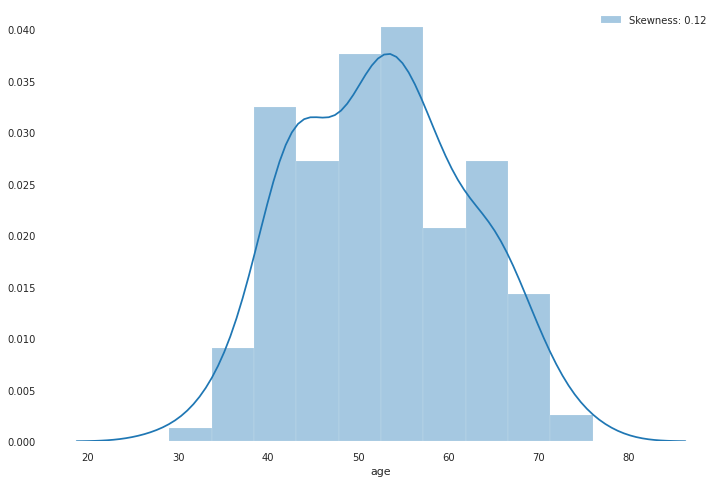

In [11]:
plt.figure(figsize=(12,8))
sns.distplot(heart_disease[heart_disease.num == 0].age, label='Skewness: %.2f' % (heart_disease[heart_disease.num == 0].age.skew()))
plt.legend()
plt.show()

Taki rozkład wieku wynika z dwóch czynników: 
* szansa na choroby serca wzrasta z wiekiem
* wzraz z wiekiem zwrasta śmiertelność

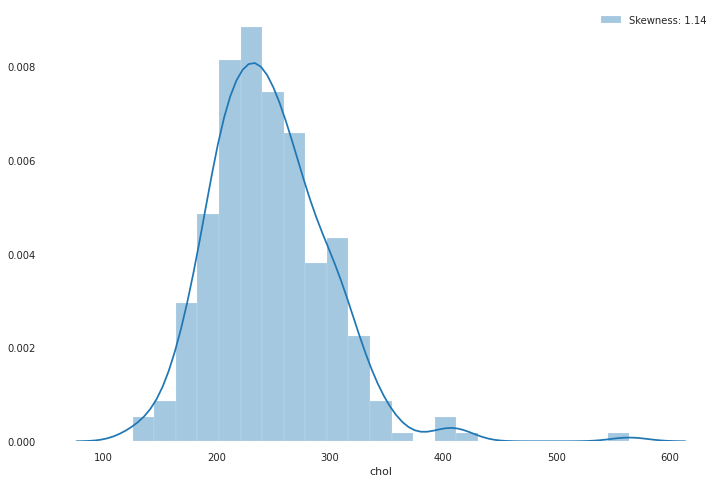

In [10]:
plt.figure(figsize=(12,8))
sns.distplot(heart_disease.chol, label='Skewness: %.2f' % (heart_disease.chol.skew()))
plt.legend()
plt.show()

Widzimy, że najczęstszy poziom cholesterolu to około 220. Dziwić może lekki "garb" około wartości 400.

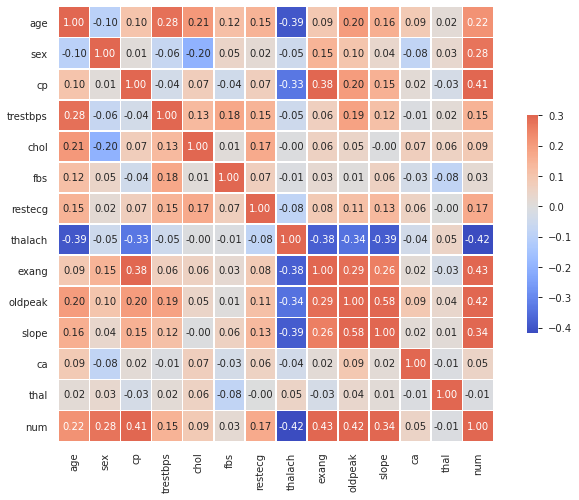

In [12]:
corr = heart_disease.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(12,8)
    
plt.show()

Mapa ciepła korelacji pokazuje że najbardziej skorelowane są slope i oldpeak oraz exag i num (odpowiednio 0.58 i 0.43).

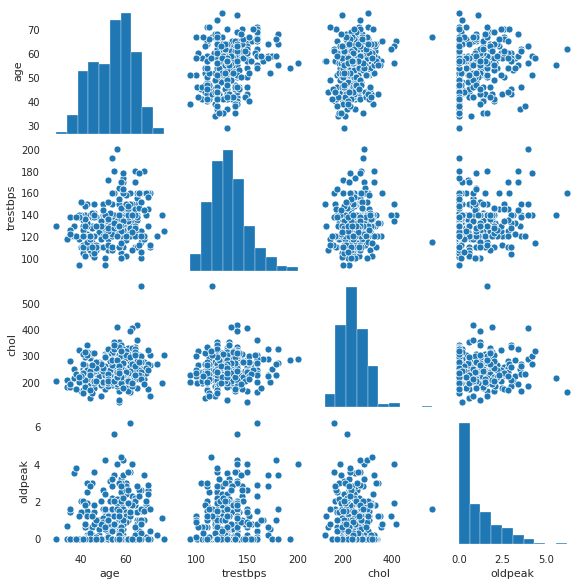

In [14]:
sns.pairplot(heart_disease[["age", "trestbps", "chol", "oldpeak"]], height=2)

Scatter ploty nie pokazują żadnej zależności między tymi wybranym kolumnami.

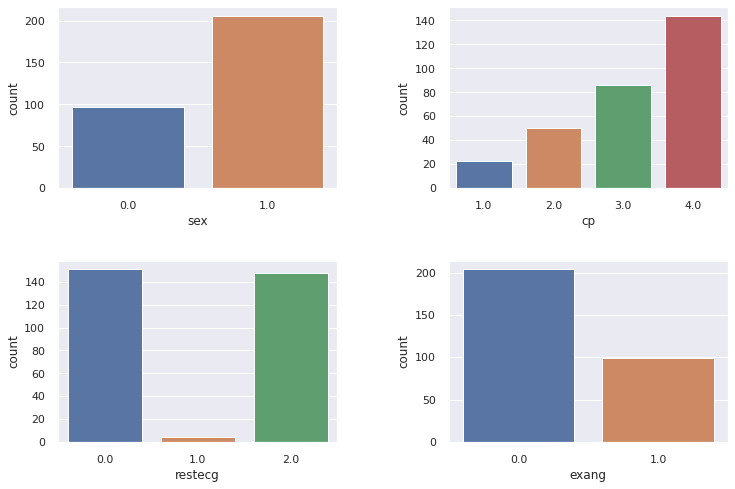

In [20]:
sns.set(style="darkgrid")
temp = ["sex", "cp", "restecg", "exang"]

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 5):
    ax = fig.add_subplot(2, 2, i),
    ax = sns.countplot(x=temp[i-1], data=heart_disease)



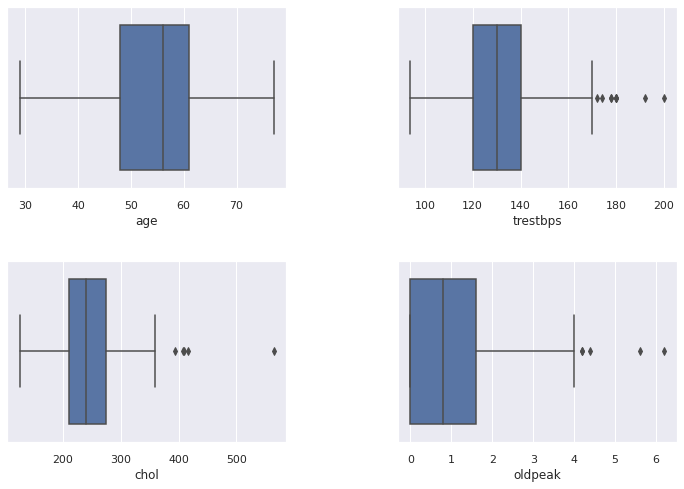

In [24]:
sns.set(style="darkgrid")

temp = ["age", "trestbps", "chol", "oldpeak"]

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 5):
    ax = fig.add_subplot(2, 2, i),
    ax = sns.boxplot(x=heart_disease[temp[i-1]])

### Raport generowany automatycznie przez pandas-profiling

In [10]:
profile = ProfileReport(heart_disease, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_notebook_iframe()